# 모델 평가

분류의 평가 지표

정확도, 오차 행렬, 분류 리포트,
정밀도, 재현율, f1_score, 정밀도-재현율 곡선(ROC), AUC

## 정확도 (Accuracy)

- 실제 데이터에서 에측 데이터가 얼마나 같은지를 판단하는 지표

 > \begin{equation}
\text{정확도(Accuracy)} = \frac{\text{예측결과가동일한데이터건수}}{\text{전체예측데이터건수}}
\end{equation}

- 직관적으로 모델 예측 성능을 나타내는 평가 지표

## 오차행렬 (Confusion Matrix)

- 학습된 분류 모델이 예측을 수행하면서 얼마나 혼란스러워(confused) 하고 있는지 함께 보여주는 지표
- 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표


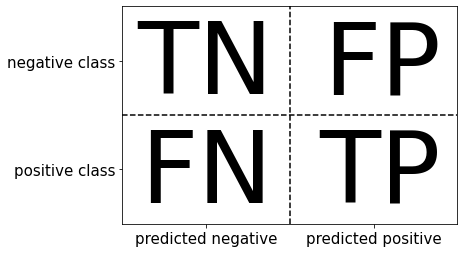

In [1]:
import mglearn
mglearn.plots.plot_binary_confusion_matrix()

- True / False : 예측값과 실제값이 같은가 /틀린가
- Negative / Positive : 예측 결과 값이 부정(0) / 긍정(1)

- TN : 예측값을 Negative 값 0으로 예측했고 실제 값은 역시 Negative 값 0
- FP : 예측값을 Positive 값 1로 예측 했는데 실제 값은 Negative 값 0
- FN : 예측값을 Negative 값 0으로 예측했는데, 실제 값은 Positive 값 1
- TP : 예측값을 Positive 값 1로 예측했는데 실제 값 역시 Positive 값 1

[confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
```
confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
```
- y_true : 정답
- y_pred : 예측 결과

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()  # 손글씨 데이터
y = digits.target == 9  # 불균형 데이터셋 생성

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [3]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.1, max_iter=1000)
model.fit(X_train, y_train)

pred_lr = model.predict(X_test)

print("score: ", model.score(X_test, y_test))

score:  0.9844444444444445


In [4]:
# 오차 행렬
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred_lr)

array([[402,   1],
       [  6,  41]], dtype=int64)

- TN FP
- FN TP


In [5]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)

pred_dt = model.predict(X_test)

print("score: ", model.score(X_test, y_test))

score:  0.9177777777777778


In [6]:
# 오차 행렬
confusion_matrix(y_test, pred_dt)

array([[390,  13],
       [ 24,  23]], dtype=int64)

In [7]:
cm = confusion_matrix(y_test, pred_dt)

(cm[0,0] + cm[1, 1]) / cm.sum()

0.9177777777777778

오차 행렬에서 정확도 재정의

> \begin{equation}
\text{Accuracy} = \frac{\text{예측결과가동일한데이터건수}}{\text{전체예측데이터건수}}
= \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

## 정밀도(Precision)와 재현율(Recall)

 > \begin{equation}
\text{정밀도} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation} <br>
 > \begin{equation}
\text{재현율} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}

정밀도
 - 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
 - 거짓양성(FP)의 수를 줄이는 것이 목표일 때 성능 지표로 사용
 - 양성 예측도(PPV) 라고도 함

재현율
 - 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
 - 모든 양성 샘플을 식별해야 할 때 성능 지표로 사용
 - 거짓 음성(FN)을 피하는 것이 중요할 때
 - 민감도(sensitivity), 적중률(hit rate), 진짜 양성 비율(TPR) 이라고도 함

- 정밀도가 상대적으로 더 중요한 지표인 경우
 - 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
 - 스팸 메일 판단 모델 : 실제 Negative인 일반 메일을 Positive인 스팸 메일로 분류하면 메일을 아예 받지 못하게 됨

- 재현율이 상대적으로 더 중요한 지표인 경우
 - 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
 - 암 판단 모델 : 실제 Positive인 암 환자를 Negative 음성으로 잘못 판단했을 경우 생명이 위험
 - 보험/금융 사기 적발 모델 : 실제 사기인 Positive 건을 Negative로 잘못 판단하면 회사에 손해가 큼

## F1 스코어

> \begin{equation}
\text{F} = 2 \cdot \frac{\text{정밀도} \cdot \text{재현율}}{\text{정밀도} + \text{재현율}}
\end{equation}

- 정밀도와 재현율을 결합한 지표
- 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 높은 값을 갖음

In [8]:
# f1_score
from sklearn.metrics import f1_score

f1_score(y_test, pred_lr), f1_score(y_test, pred_dt)

(0.9213483146067415, 0.5542168674698795)

## 분류 리포트

[classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

- 정밀도, 재현율, f1-스코어 모두를 한 번에 깔끔하게 출력

In [9]:
# 분류 리포트 DecisionTreeClassifier
from sklearn.metrics import classification_report

report = classification_report(y_test, pred_dt)
print(report)

precision    recall  f1-score   support

       False       0.94      0.97      0.95       403
        True       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



In [10]:
# 분류 리포트 LogisticRegression
report = classification_report(y_test, pred_lr)
print(report)

precision    recall  f1-score   support

       False       0.99      1.00      0.99       403
        True       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



- macro avg : 클래스별 점수의 평균을 계산
- weighted avg : 클래스의 샘플 수로 가중 평균

## ROC, AUC


ROC(Receiver Operating Characteristic) : 여러 임계값에서 분류기의 특성을 분석하는데 널리 사용되는 도구
- ROC 곡선은 분류기의 모든 임계값을 고려하지만 정밀도와 재현율 대신에 거짓 양성 비율 (FPR)이 변할 때 진짜 양성 비율 (TPR)이 어떻게 변하는지를 나타내는 곡선

> \begin{equation}
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}

- 진짜 양성비율 : 재현율
- 가짜 양성비율 : 전체 음성 샘플 중에서 거짓 양성으로 잘못 분류한 비율

AUC(Area Under the Curve) : ROC 곡선 아래의 면적값



- [roc_curve()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) : ROC 곡선을 그리는 메소드
- [roc_auc_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) : AUC 계산 메소드

[roc_curve()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) : ROC 곡선을 그리는 메소드

Parameters
- y_true : 실재 클래스 값 array (array shape = [데이터 건수])
- y_score : predict_proba()의 반환 값 array에서 Positive 컬럼의 예측 확뉼이 보통 사용됨. array, shape = [n_samples]

Returns
- fpr : FPR (거짓 양성 비율)
- tpr : TPR (진짜 양성 비율, 재현율, 민감도)
- thresholds : fpr 및 tpr을 계산하는 데 사용되는 결정 함수의 임계값

In [11]:
# 부드러운 곡선을 위해 데이터 포인트 수를 늘립니다
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model_svc = SVC(gamma=0.05).fit(X_train, y_train)


결정함수(decision_function)와 예측확률(predict_proba)

- 분류모델 예측의 불확실성을 추정할 수 있는 기능
- 결정함수(decision_function)의 값은 1차원으로 데이터 포인트가 양성 클래인 클래스 1에 속한다고 믿는 정도
 - 양수 값은 양성 클래스를 의미하며 음수 값은 음성 클래스를 의미

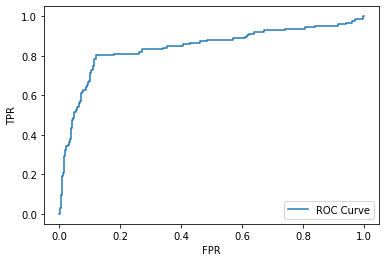

In [12]:
# ROC 곡선 그리기
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np


# 결정 함수 decision_function
fpr, tpr, thresholds = roc_curve(y_test, model_svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc=4)


- ROC 곡선은 왼쪽 위에 가까울수록 이상적
- 거짓 양성 비율(FPR)이 낮게 유지되면서 재현율이 높은 분류기가 좋은 것

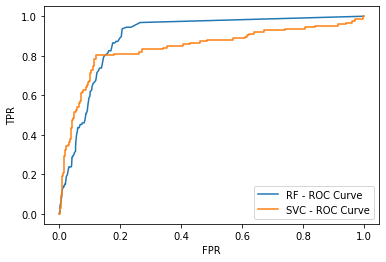

In [13]:
# 랜덤 포레스트와 SVM의 ROC 곡선 비교
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, 
                                  max_features=2, 
                                  random_state=0).fit(X_train, y_train)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1] )

plt.plot(fpr_rf, tpr_rf, label="RF - ROC Curve")
plt.plot(fpr, tpr,       label="SVC - ROC Curve")

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc=4)

In [14]:
# AUC
from sklearn.metrics import roc_auc_score

auc_rf = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:,1] )
auc_svc = roc_auc_score(y_test, model_svc.decision_function(X_test) )
print("랜덤포레스트 AUC: {:.3f}".format(auc_rf))
print("SVC          AUC: {:.3f}".format(auc_svc))

랜덤포레스트 AUC: 0.895
SVC          AUC: 0.842


- 랜덤포레스트의 성능이 SVC보다 조금 더 나음
- 불균형한 데이터셋에서는 정확도보다 AUC가 훨씬 좋은 지표

## 모델평가 실습 01


In [15]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

cancer.target_names # 악성, 양성

array(['malignant', 'benign'], dtype='<U9')

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model_lr = LogisticRegression(C=0.001).fit(X_train, y_train)

pred_lr = model_lr.predict(X_test)

### confusion matrix

- 0,0 진짜 악성, 예측 악성
- 0,1 진짜 악성, 예측 양성
- 1,0 진짜 양성, 예측 악성
- 1,1 진짜 양성, 예측 양성

In [17]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# 오차 행렬
confusion_matrix(y_test, pred_lr)

array([[50,  3],
       [ 5, 85]], dtype=int64)

In [18]:
# 분류 리포트
from sklearn.metrics import classification_report

report = classification_report(y_test, pred_lr)
print(report)

precision    recall  f1-score   support

           0       0.91      0.94      0.93        53
           1       0.97      0.94      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



- 0(악성 종양)을 양성으로 볼 경우 윗 줄, 1(양성 종양)을 양성으로 볼 경우 아랫 줄

### ROC 곡선 그리기

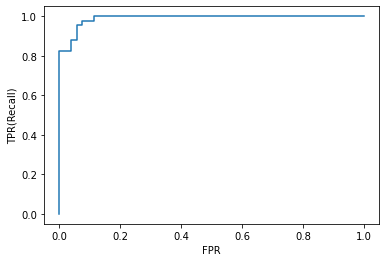

In [19]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# 결정함수
fpr, tpr, thresholds = roc_curve(y_test, model_lr.decision_function(X_test))
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR(Recall)")
plt.show()

### C값 조정

In [20]:
from  sklearn.model_selection import GridSearchCV
# GridSearchCV
# param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] }
# 분류리포트 1의 경우 f1-score 는? 

param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_search = GridSearchCV(LogisticRegression(), param_grid).fit(X_train, y_train)

print( metrics.classification_report(y_test, grid_search.predict(X_test)))


precision    recall  f1-score   support

           0       0.90      0.98      0.94        53
           1       0.99      0.93      0.96        90

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143



### ROC 곡선 비교

GridSearchCV       AUC: 0.994
LogisticRegression AUC: 0.989


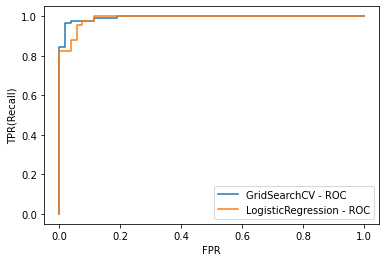

In [21]:
fpr2, tpr2, th2 = roc_curve(y_test, grid_search.decision_function(X_test) )
plt.plot(fpr2, tpr2, label="GridSearchCV - ROC")
plt.plot(fpr, tpr,   label="LogisticRegression - ROC")
plt.xlabel("FPR")
plt.ylabel("TPR(Recall)")
plt.legend(loc=4)

# AUC
auc1 = roc_auc_score(y_test, model_lr.decision_function(X_test) )
auc2 = roc_auc_score(y_test, grid_search.decision_function(X_test) )
print("GridSearchCV       AUC: {:.3f}".format(auc2))
print("LogisticRegression AUC: {:.3f}".format(auc1))

### scoring을 이용한 ROC 교차검증

- scoring은 성능검증에 사용할 함수이름

In [22]:
from sklearn.model_selection import cross_val_score

C_list = [0.001,0.01,0.1,1,10,100,1000]

for c in C_list:
    m = LogisticRegression(C=c)
    rs = cross_val_score(m,X_train, y_train, scoring="roc_auc")
    print(c, "\t:", rs.mean())

0.001 	: 0.9855873543202364
0.01 	: 0.9832328791055206
0.1 	: 0.9861468266044499
1 	: 0.9890080814228714
10 	: 0.9866844610130519
100 	: 0.9898894862604539
1000 	: 0.9895591003358806


### ROC 곡선 비교

LogisticRegression2 AUC: 0.994
GridSearchCV        AUC: 0.994
LogisticRegression  AUC: 0.989


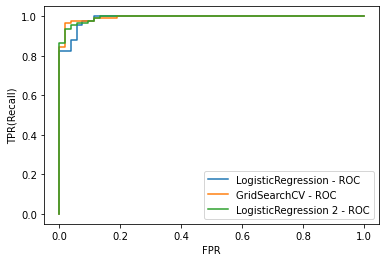

In [23]:
model_lr2 = LogisticRegression(C=10).fit(X_train,y_train)

fpr3,tpr3,th3 = roc_curve(y_test, model_lr2.decision_function(X_test))

plt.plot(fpr, tpr,   label="LogisticRegression - ROC")
plt.plot(fpr2, tpr2, label="GridSearchCV - ROC")
plt.plot(fpr3, tpr3, label="LogisticRegression 2 - ROC")
plt.xlabel("FPR")
plt.ylabel("TPR(Recall)")
plt.legend(loc=4)

# AUC
auc1 = roc_auc_score(y_test, model_lr.decision_function(X_test) )
auc2 = roc_auc_score(y_test, grid_search.decision_function(X_test) )
auc3 = roc_auc_score(y_test, model_lr2.decision_function(X_test) )
print("LogisticRegression2 AUC: {:.3f}".format(auc3))
print("GridSearchCV        AUC: {:.3f}".format(auc2))
print("LogisticRegression  AUC: {:.3f}".format(auc1))

# 정리

1. 교차 검증을 해야 한다.
> 데이터를 분리해서 사용. 간단하게 한 번만 분리하는 대신 교차 검증으로 분할을 반복
 - 모델 학습에는 훈련 데이터
 - 모델과 매개변수 선택에는 검증 데이터
 - 모델 평가에는 테스트 데이터
 
 > 훈련 세트와 테스트 세트로 분할하고 모델과 모델 매개변수 선택을 위해 훈련 세트에 교차 검증을 적용


2. 모델 선택과 평가에 사용하는 평가 지표와 방법이 중요하다.
> 모델을 평가하고 선택하기 위한 지표가 이 모델이 실제로 사용되는 상황을 잘 대변해야 함
 - 실전에서는 분류 문제에 균형 잡힌 클래스를 가진 경우가 거의 없음
 - 거짓 양성(FP)과 거짓 음성(FN)이 매우 큰 영향을 미침